Measured error => 0.8104674927238128


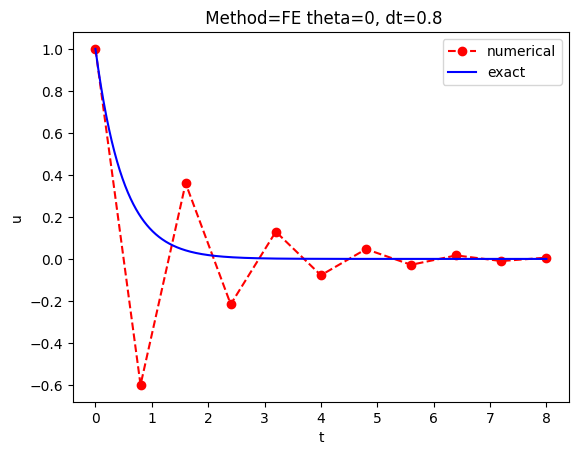

Measured error => 0.1953976935916231


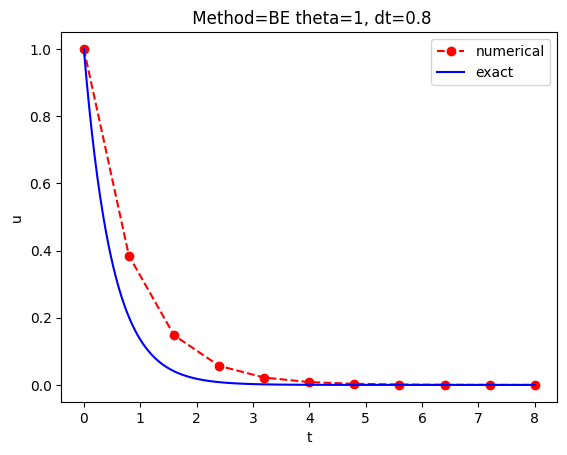

Measured error => 0.08531778111804493


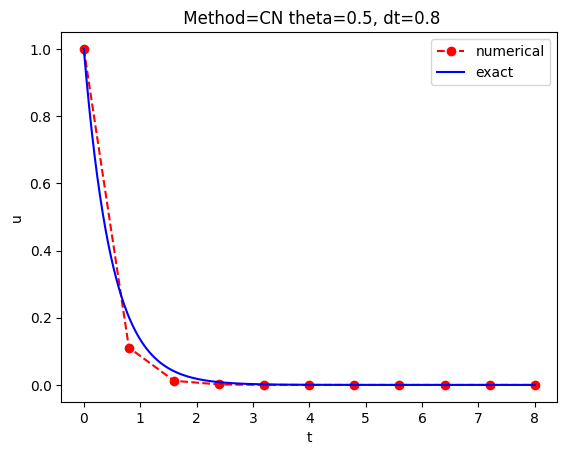

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import latexify


import numpy as np

identifiers = {
    "my_function": "f",
    "my_inner_function": "g",
    "theta": "0",
}


@latexify.function()
def theta_formula(u_n: float, a: float, dt: float, theta: float):
    return ((1 - (1 - theta) * a * dt) / (1 + theta * a * dt)) * u_n


def solver(I: float, a: float, T: float, dt: float, theta: float):
    """Solve u'=-a*u, u(0)=I, for t in (0, T] with steps of dt."""
    dt = float(dt)  # Ensure dt is a float
    Nt = round(T / dt)  # Number of time steps
    T = Nt * dt  # Adjust T to fit the time step

    u = np.zeros(Nt + 1)  # Array for solution values
    t = np.linspace(0, T, Nt + 1)  # Time mesh

    u[0] = I  # Initial condition

    for n in range(Nt):  # Iterate from 0 to Nt-1
        u[n + 1] = theta_formula(u[n], a, dt, theta)

    return u, t


def u_exact(t: float, I: float, a: float) -> float:
    """Exact solution of u' = -a*u with initial condition u(0) = I."""
    return I * np.exp(-a * t)


def plot_results(makeplot, t, u, T, I, a, theta, dt):
    if makeplot:
        plt.figure()
        t_e = np.linspace(0, T, 1001)
        u_e = u_exact(t_e, I, a)

        plt.plot(t, u, "r--o", label="numerical")
        plt.plot(t_e, u_e, "b-", label="exact")

        plt.legend()
        plt.xlabel("t")
        plt.ylabel("u")
        theta2name = {0: "FE", 1: "BE", 0.5: "CN"}
        plt.title(" Method=%s theta=%g, dt=%g" % (theta2name[theta],theta, dt))


        plt.savefig("%s_%g.png" % (theta2name[theta], dt))
        plt.savefig("%s_%g.pdf" % (theta2name[theta], dt))
        plt.show()


def plot_numerical_and_exact(theta, I, a, T, dt):
    """Compare the numerical and exact solution in a plot."""

    u, t = solver(I=I, a=a, T=T, dt=dt, theta=theta)

    t_e = np.linspace(0, T, 1001)  # Fine mesh for exact solution, This gives smooth curve
    u_e = u_exact(t, I, a)

    e = u_e - u
    E = np.sqrt(dt * np.sum(e**2))
    print(f"Measured error => {E}")

    plot_results(makeplot=True,theta=theta,dt=dt,t=t,u=u,I=I,a=a,T=T)


# Example call to function

plot_numerical_and_exact(I=1, a=2, T=8, dt=0.8, theta=0)

plot_numerical_and_exact(I=1, a=2, T=8, dt=0.8, theta=1)

plot_numerical_and_exact(I=1, a=2, T=8, dt=0.8, theta=1 / 2)
theta_formula


In [ ]:
theta_formula  # unfortunately not worked as per my expectation, why can't call from a function

Note:
Tools to make side by side image comparison
https://www.imagemagick.org/script/montage.php

### Note: Testing vectorization using numpy

This results shows the vectorization process should be used during computation, which is way faster that convetiobal looping method.

# NumPy Vectorized Operations Summary

| **Category**         | **Operation**                | **Example**                  |
|----------------------|----------------------------|------------------------------|
| **Arithmetic Ops**   | Addition, Subtraction      | `arr1 + arr2`, `arr1 - arr2` |
|                      | Multiplication, Division   | `arr1 * arr2`, `arr1 / arr2` |
| **Exponential & Log**| Exponential (`e^x`)        | `np.exp(arr)`                |
|                      | Natural Log                | `np.log(arr)`                |
|                      | Square Root                | `np.sqrt(arr)`               |
| **Trigonometry**     | Sine, Cosine, Tangent      | `np.sin(arr)`, `np.cos(arr)` |
| **Aggregations**     | Sum, Mean, Max, Min        | `np.sum(arr)`, `np.mean(arr)` |
|                      | Product of Elements       | `np.prod(arr)`               |
| **Comparison & Logical** | Element-wise Comparison  | `arr > 3`, `arr == 2`        |
|                      | Modulus Condition         | `arr % 2 == 0`               |
| **Filtering**        | Selecting Specific Values  | `arr[arr > 25]`              |
| **Dot Product**      | Matrix Multiplication      | `np.dot(A, B)`, `A @ B`      |
| **Broadcasting**     | Operating with Scalars     | `arr + scalar`               |
| **Cumulative Ops**   | Cumulative Sum & Product   | `np.cumsum(arr)`, `np.cumprod(arr)` |



In [19]:
import time
import numpy as np

# Create a large array
arr_large = np.arange(1, 10**6)

# Loop-based computation (Non-vectorized)
start_time = time.time()
squared_loop = np.zeros(len(arr_large))
for i in range(len(arr_large)):
    squared_loop[i] = arr_large[i] ** 2
end_time = time.time()
print(f"Loop time: {end_time - start_time:.6f} sec")

# Vectorized computation
start_time = time.time()
squared_vec = arr_large**2
end_time = time.time()
print(f"Vectorized time: {end_time - start_time:.6f} sec")


Loop time: 0.394961 sec
Vectorized time: 0.002871 sec


# Problem

A detective measures the temperature of a dead body to be 26.7 C at 2 pm. One hour later the temperature is 25.8 C. The question is when death occurred.

Assume the temperature in the air to be 20 C. Thereafter, simulate the temperature evolution from the time of murder, taken as t = 0, when T = 37 C.

In [1]:

import numpy as np


T_n_1 = 25.8
T_n = 26.7
dT = T_n_1 - T_n
dt_minutes = 60

T_e = 20

k = -dT/(dt_minutes*(T_e-T_n_1))
print(k)



T0 = 37  # Assumed body temperature at time of death
T_measured = T_n  # Measured temperature at 2 PM

# Solve for time since death
t_death_minutes = - (1 / k) * np.log((T_measured - T_e) / (T0 - T_e))

# Convert to hours
t_death_hours = t_death_minutes / 60
print(f"Estimated time of death: {t_death_hours:.2f} hours before 2 PM")



-0.0025862068965517198
Estimated time of death: -6.00 hours before 2 PM
